In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/raw/player.csv',
               encoding='latin-1')
df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,29/02/1992 00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,15/12/1989 00:00,170.18,146
2,3,162549,Aaron Doran,186170,13/05/1991 00:00,170.18,163
3,4,30572,Aaron Galindo,140161,08/05/1982 00:00,182.88,198
4,5,23780,Aaron Hughes,17725,08/11/1979 00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,03/04/1979 00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,18/12/1986 00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,29/04/1979 00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,06/10/1981 00:00,185.42,172


In [3]:
df.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [4]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [5]:
df = df.astype({'birthday':'datetime64[ns]'})
df.dtypes

C:\Users\gabri\AppData\Local\Temp\ipykernel_19788\626771191.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = df.astype({'birthday':'datetime64[ns]'})


id                             int64
player_api_id                  int64
player_name                   object
player_fifa_api_id             int64
birthday              datetime64[ns]
height                       float64
weight                         int64
dtype: object

In [6]:
df.describe()

,id,player_api_id,player_fifa_api_id,birthday,height,weight
count,11060.00,11060.00,11060.00,11060,11060.00,11060.00
mean,5537.51,156582.43,165664.91,1987-02-03 21:19:20.072332800,181.87,168.38
min,1.00,2625.00,2.00,1967-01-23 00:00:00,157.48,117.00
25%,2767.75,35555.50,151889.50,1983-03-17 00:00:00,177.80,159.00
50%,5536.50,96619.50,184671.00,1987-07-08 00:00:00,182.88,168.00
75%,8306.25,212470.50,203883.25,1991-04-12 00:00:00,185.42,179.00
max,11075.00,750584.00,234141.00,1999-04-24 00:00:00,208.28,243.00
std,3197.69,160713.70,58649.93,NaN,6.37,14.99


In [7]:
simple_profile = df.describe(include='all')
simple_profile

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
count,11060.00,11060.00,11060,11060.00,11060,11060.00,11060.00
unique,NaN,NaN,10848,NaN,NaN,NaN,NaN
top,NaN,NaN,Danilo,NaN,NaN,NaN,NaN
freq,NaN,NaN,7,NaN,NaN,NaN,NaN
mean,5537.51,156582.43,NaN,165664.91,1987-02-03 21:19:20.072332800,181.87,168.38
min,1.00,2625.00,NaN,2.00,1967-01-23 00:00:00,157.48,117.00
25%,2767.75,35555.50,NaN,151889.50,1983-03-17 00:00:00,177.80,159.00
50%,5536.50,96619.50,NaN,184671.00,1987-07-08 00:00:00,182.88,168.00
75%,8306.25,212470.50,NaN,203883.25,1991-04-12 00:00:00,185.42,179.00
max,11075.00,750584.00,NaN,234141.00,1999-04-24 00:00:00,208.28,243.00


In [8]:
profile = ProfileReport(df, title="Export Data Profiling Report")

In [9]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
def get_basic_profile(dataframe):
    quantile_range = 0.5
    results = {}
    
    for column in dataframe.columns:
        count = df[column].count()
        nans = df[column].isna().sum()
        min = df[column].min()
        max = df[column].max()
        median = df[column].median()
        std = df[column].std()
        kurt = df[column].kurt()
        skew = df[column].skew()
        quant = df[column].quantile(q=quantile_range)
        
        results[column] = {'count': count,
                            'count_na': nans,
                            'min':min,
                            'max':max,
                            'median':median,
                            'std':std,
                            'kurt':kurt,
                            'skew':skew,
                            'quant {quantile_range}':quant}
 
    return results

In [11]:
num_columns = df.select_dtypes(include=['int64','float64'])
basic_profile = get_basic_profile(num_columns)
basic_profile

{'id': {'count': 11060,
  'count_na': 0,
  'min': 1,
  'max': 11075,
  'median': 5536.5,
  'std': 3197.692646865567,
  'kurt': -1.200473786126885,
  'skew': 0.0006889413122463412,
  'quant {quantile_range}': 5536.5},
 'player_api_id': {'count': 11060,
  'count_na': 0,
  'min': 2625,
  'max': 750584,
  'median': 96619.5,
  'std': 160713.70062373255,
  'kurt': 1.3629892828398216,
  'skew': 1.4329721273393883,
  'quant {quantile_range}': 96619.5},
 'player_fifa_api_id': {'count': 11060,
  'count_na': 0,
  'min': 2,
  'max': 234141,
  'median': 184671.0,
  'std': 58649.92836028489,
  'kurt': 1.514806464900758,
  'skew': -1.5492547852587037,
  'quant {quantile_range}': 184671.0},
 'height': {'count': 11060,
  'count_na': 0,
  'min': 157.48,
  'max': 208.28,
  'median': 182.88,
  'std': 6.369200906779238,
  'kurt': -0.16978104518413906,
  'skew': -0.005222097763681076,
  'quant {quantile_range}': 182.88},
 'weight': {'count': 11060,
  'count_na': 0,
  'min': 117,
  'max': 243,
  'median': 16

Text(0.5, 1.0, 'Height count')

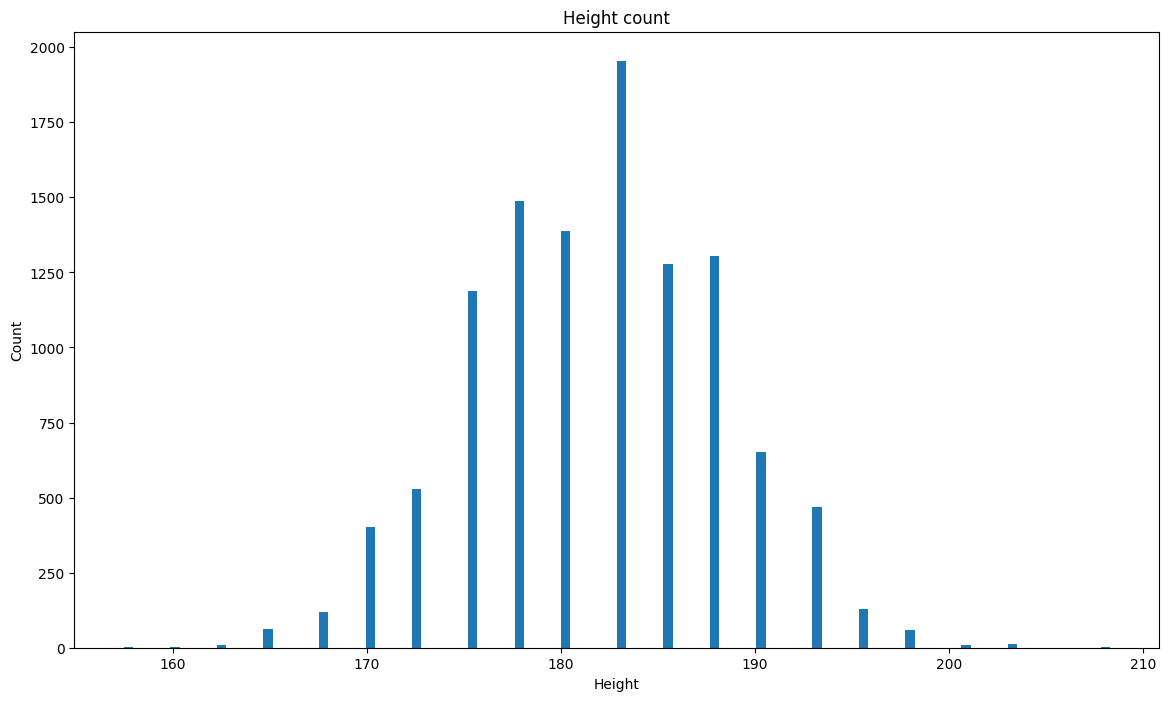

In [12]:
# square root choice
bins = int(np.ceil(np.sqrt(len(num_columns['height']))))
 
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.hist(num_columns['height'], bins)
 
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Height')
ax.set_ylabel('Count')
ax.set_title(r'Height count')
# plt.savefig("mygraph.jpg")